![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/logo_MCV_W.png)

# **Arithmetic and Bitwise Operations**

#### **In this lesson we'll learn:**
1. Arithmetic Operations
2. Bitwise Operations

In [1]:
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2023-05-20 03:17:12--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.142.114
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.142.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  17.6MB/s    in 1.6s    

2023-05-20 03:17:14 (17.6 MB/s) - ‘images.zip’ saved [29586716/29586716]



In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(title = "Image", image = None, size = 10):
    h, w = image.shape[:2]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(title)
    plt.show()

## **Arithmetic Operations**

These are simple operations that allow us to directly add or subract to the color intensity.

Calculates the per-element operation of two arrays. The overall effect is increasing or decreasing brightness.

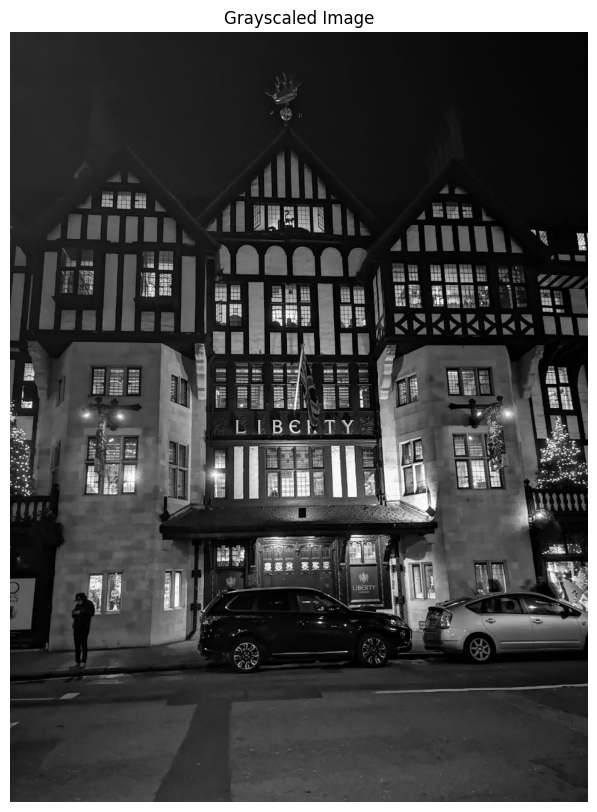

In [3]:
# Adding comma zero in cv2.imread loads our image in as a grayscaled image
image = cv2.imread('images/liberty.jpeg', 0)
imshow("Grayscaled Image",image)
print(image)

# Create a matrix of ones, then multiply it by a scaler of 100 
# This gives a matrix with same dimesions of our image with all values being 100
M = np.ones(image.shape, dtype = "uint8") * 100 



In [4]:
print(M)

[[41 41 41 ...  5  5  5]
 [41 41 41 ...  5  5  5]
 [41 41 41 ...  5  5  5]
 ...
 [41 42 44 ... 34 33 32]
 [43 44 46 ... 31 30 28]
 [44 45 46 ... 32 30 29]]
[[100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]
 ...
 [100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]]


#### **Increasing Brightness**

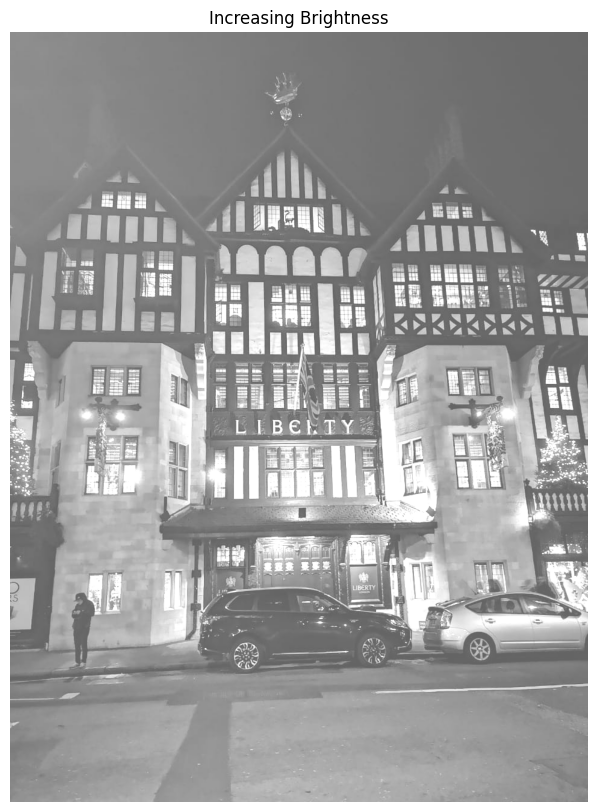

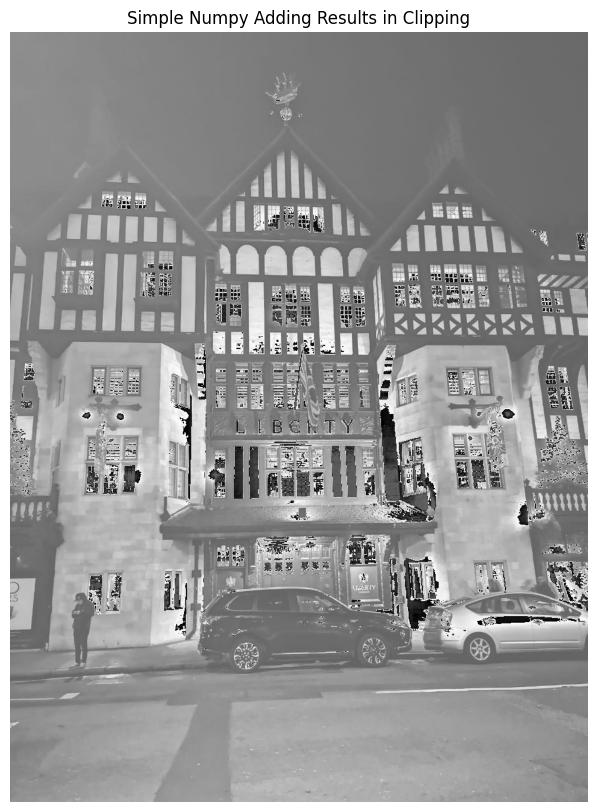

In [5]:
# We use this to add this matrix M, to our image
# Notice the increase in brightness
added = cv2.add(image, M)
imshow("Increasing Brightness", added)

# Now if we just added it, look what happens
added2 = image + M 
imshow("Simple Numpy Adding Results in Clipping", added2)

In [6]:
def isValid(arr):
  result = []
  for i in range(len(arr)):
    for j in range(len(arr[i])):
      if arr[i][j] > 255 or arr[i][j] < 100:
        result.append(arr[i][j])
  return result

In [7]:
print(isValid(added))

[]


In [8]:
print(isValid(added2))

[1, 21, 17, 1, 29, 32, 26, 20, 16, 31, 66, 59, 35, 16, 8, 3, 6, 65, 41, 24, 11, 2, 1, 3, 0, 2, 3, 0, 0, 7, 0, 0, 6, 1, 4, 5, 6, 2, 5, 0, 0, 1, 2, 0, 5, 1, 0, 1, 3, 2, 7, 6, 4, 5, 7, 5, 5, 0, 0, 0, 7, 1, 2, 6, 5, 5, 8, 6, 2, 2, 0, 1, 8, 1, 2, 5, 6, 8, 0, 4, 0, 2, 4, 4, 3, 8, 3, 8, 0, 8, 5, 1, 9, 8, 9, 8, 8, 15, 7, 6, 5, 6, 4, 9, 3, 9, 3, 13, 2, 5, 8, 2, 0, 17, 3, 3, 9, 0, 3, 3, 10, 9, 9, 11, 17, 6, 12, 16, 5, 4, 0, 0, 7, 7, 3, 6, 1, 7, 1, 6, 1, 6, 0, 0, 4, 2, 0, 1, 4, 4, 3, 1, 5, 0, 4, 1, 9, 7, 9, 3, 9, 13, 8, 0, 6, 2, 10, 2, 2, 5, 6, 3, 4, 9, 4, 3, 10, 3, 1, 5, 5, 9, 10, 0, 9, 6, 11, 10, 19, 4, 6, 4, 10, 9, 2, 6, 2, 1, 2, 4, 1, 7, 11, 1, 7, 12, 6, 7, 17, 16, 5, 9, 11, 7, 5, 8, 6, 6, 0, 11, 13, 3, 9, 4, 15, 9, 10, 12, 14, 10, 1, 6, 8, 0, 2, 2, 5, 7, 1, 20, 5, 10, 1, 2, 10, 7, 5, 10, 12, 15, 10, 12, 11, 12, 8, 13, 13, 6, 16, 8, 1, 17, 2, 7, 6, 8, 14, 14, 12, 0, 6, 5, 2, 0, 4, 5, 3, 19, 6, 7, 8, 3, 4, 21, 2, 9, 6, 10, 1, 18, 11, 12, 11, 12, 9, 13, 13, 10, 3, 8, 11, 6, 3, 9, 3, 4, 0, 3, 1,

#### **Decreasing Brightness**

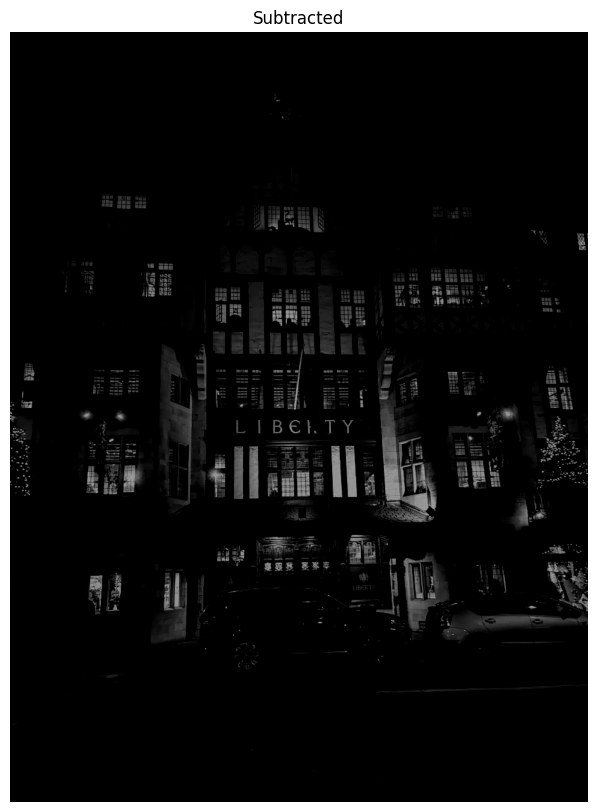

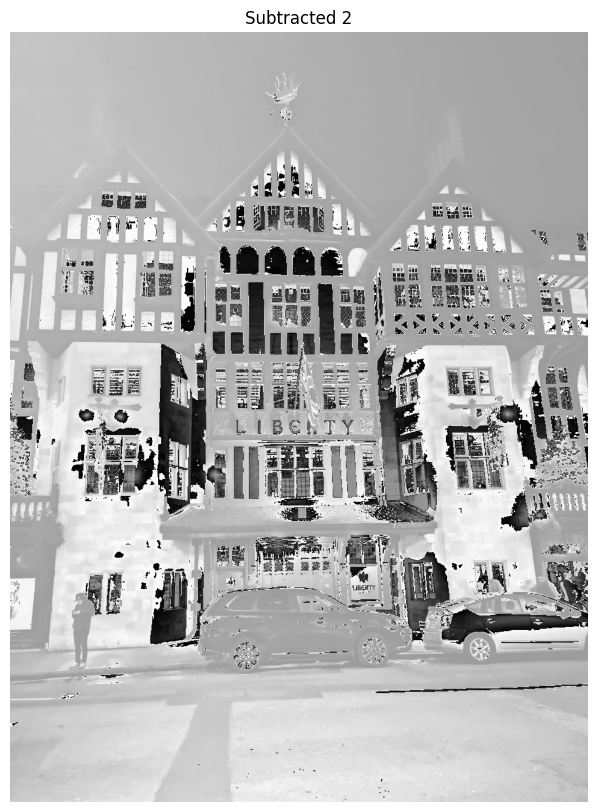

In [9]:
# Likewise we can also subtract
# Notice the decrease in brightness
subtracted = cv2.subtract(image, M)
imshow("Subtracted", subtracted)

subtracted = image - M 
imshow("Subtracted 2", subtracted)


## **Bitwise Operations and Masking**

To demonstrate these operations let's create some simple images

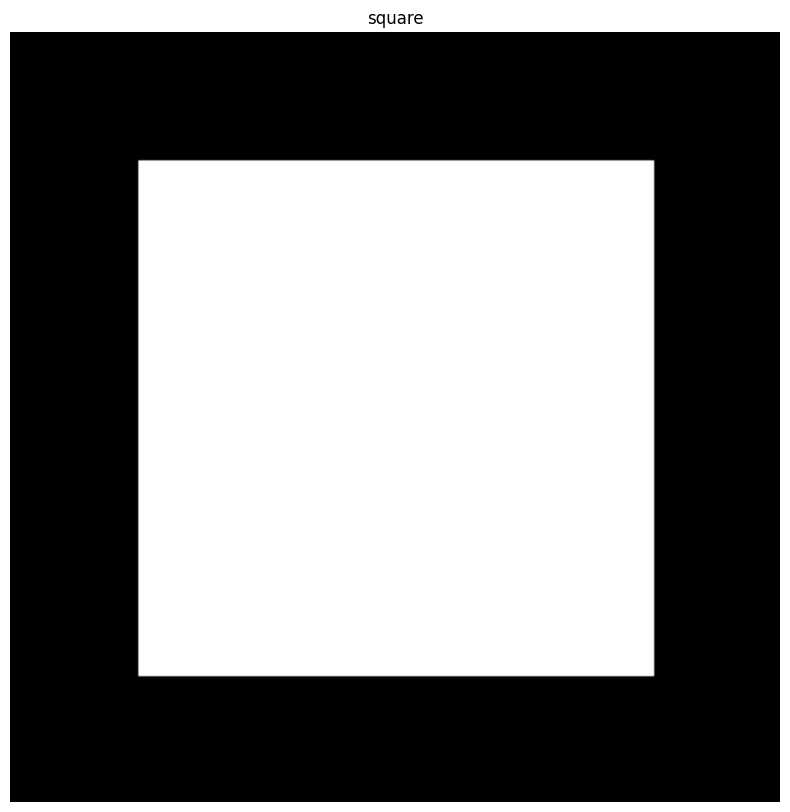

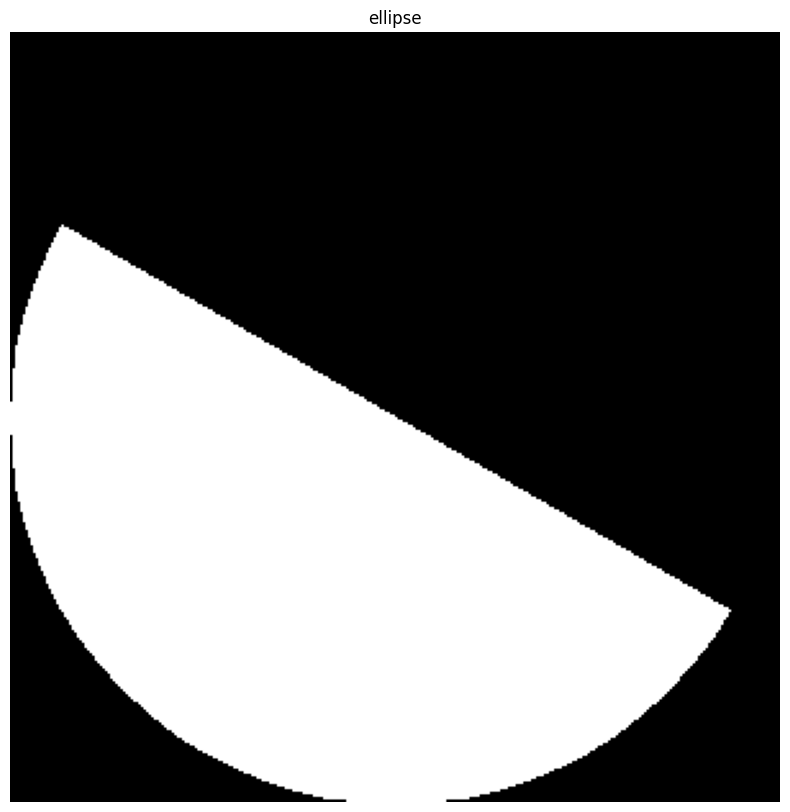

In [10]:
# If you're wondering why only two dimensions, well this is a grayscale image, 

# Making a square
square = np.zeros((300, 300), np.uint8)
cv2.rectangle(square, (50, 50), (250, 250), 255, -2)
imshow("square", square)

# Making a ellipse
ellipse = np.zeros((300, 300), np.uint8)
cv2.ellipse(ellipse, (150, 150), (150, 150), 30, 0, 180, 255, -1)
imshow("ellipse", ellipse)

### **Experimenting with some bitwise operations such as AND, OR, XOR and NOT**

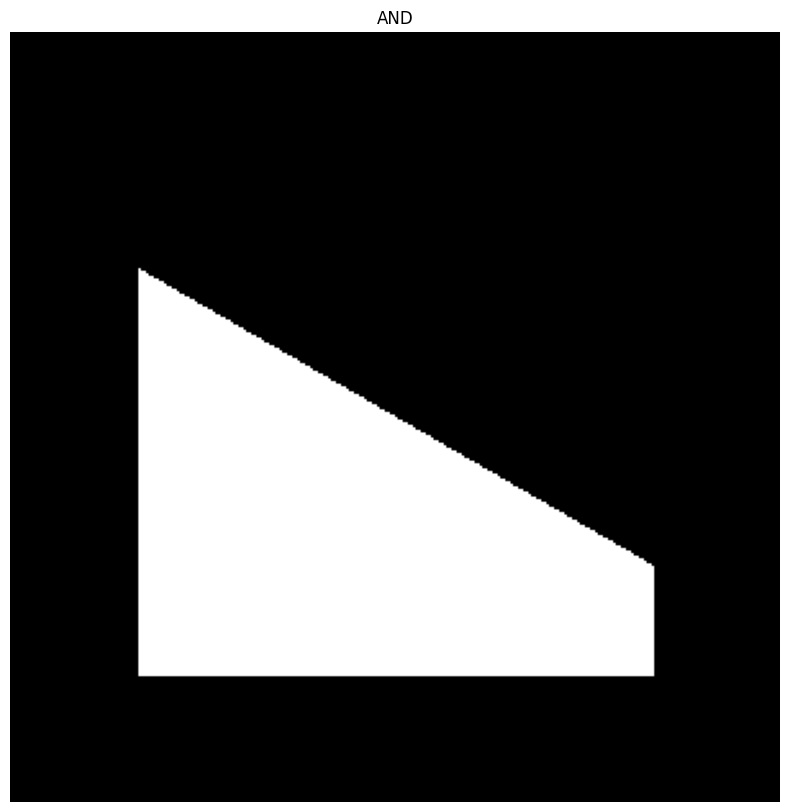

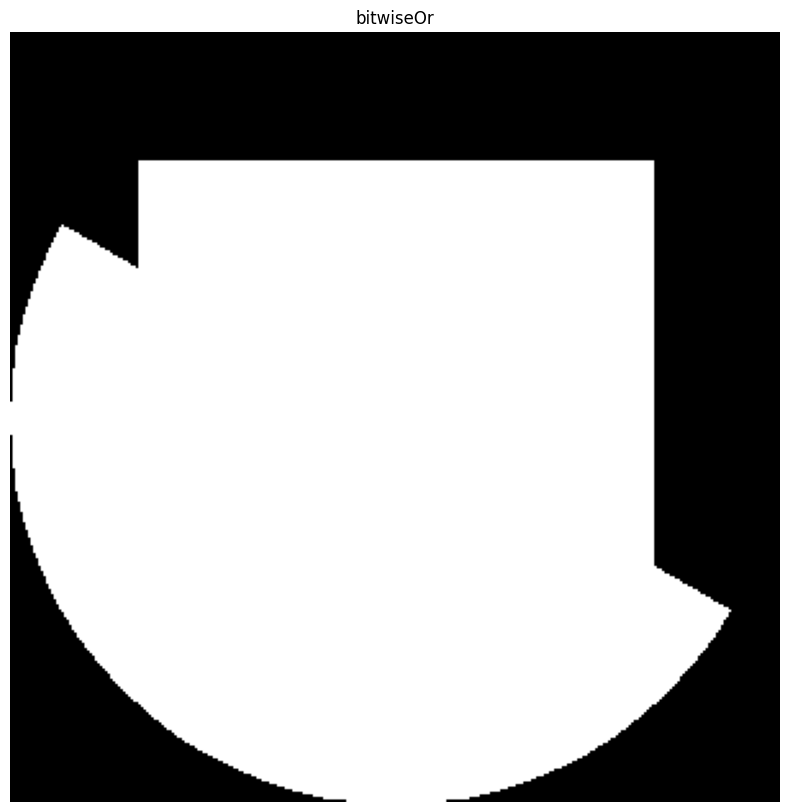

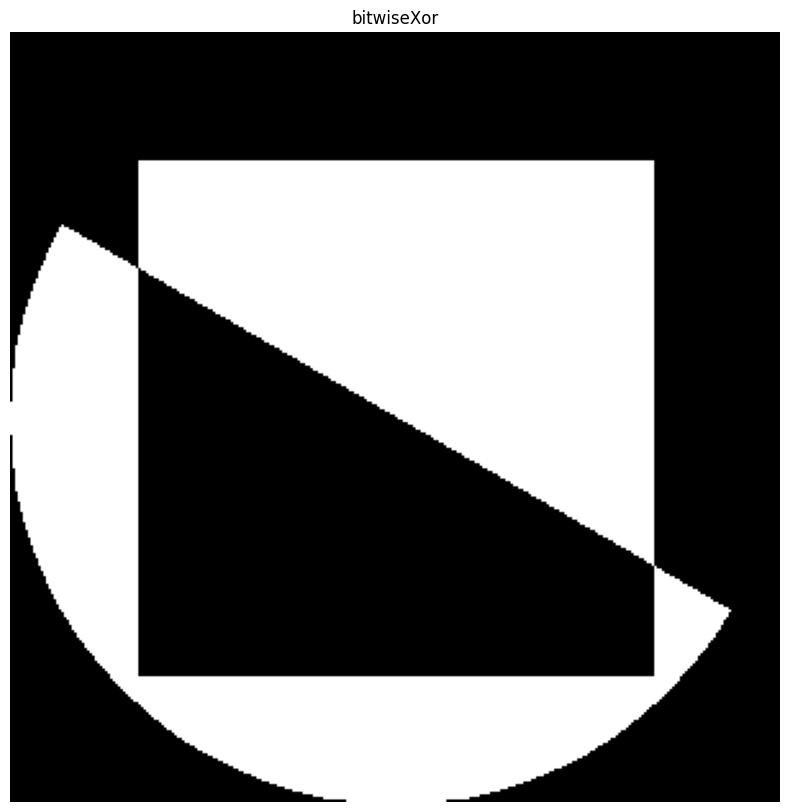

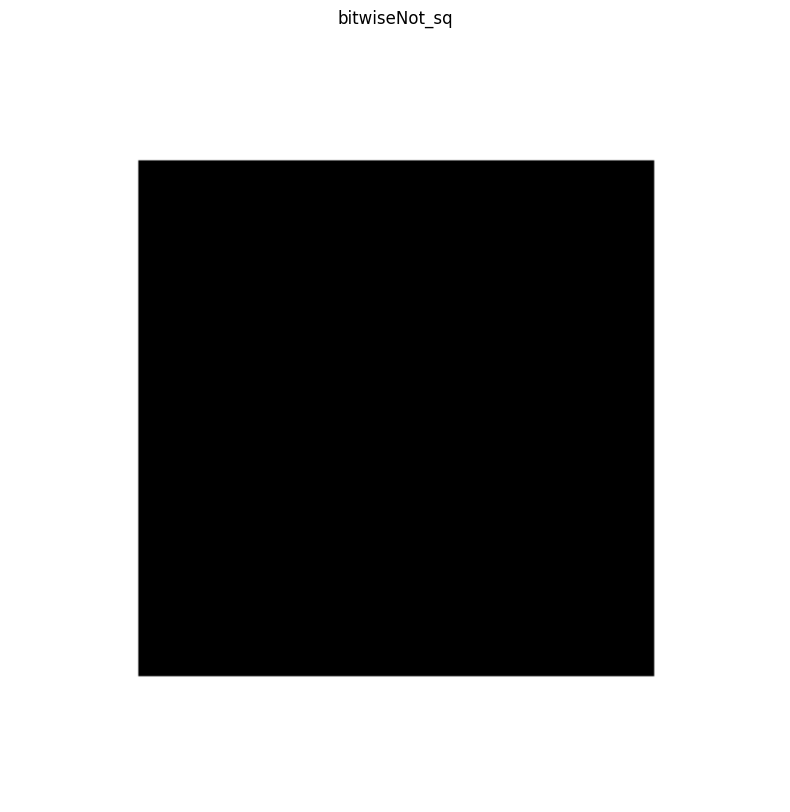

In [11]:
# Shows only where they intersect
And = cv2.bitwise_and(square, ellipse)
imshow("AND", And)

# Shows where either square or ellipse is 
bitwiseOr = cv2.bitwise_or(square, ellipse)
imshow("bitwiseOr", bitwiseOr)

# Shows where either exist by itself
bitwiseXor = cv2.bitwise_xor(square, ellipse)
imshow("bitwiseXor", bitwiseXor)

# Shows everything that isn't part of the square
bitwiseNot_sq = cv2.bitwise_not(square)
imshow("bitwiseNot_sq", bitwiseNot_sq)

# Notice the last operation inverts the image totally